In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/MFG10YearTerminationData.csv')

In [7]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [8]:
df.shape

(49653, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [10]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [11]:
df.drop(['EmployeeID', 'birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)

In [12]:
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [13]:
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [14]:
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [15]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [16]:
board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable',
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology',
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer',
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

df['job_title'] = df['job_title'].map(job_title)

In [17]:
df.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

In [18]:
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

df['city_name'] = df['city_name'].map(city_population)

In [19]:
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

df['city_name'] = df.city_name.map(change_city)

In [20]:
df['city_name'].unique()

array(['mega', 'town', 'rural'], dtype=object)

In [21]:
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


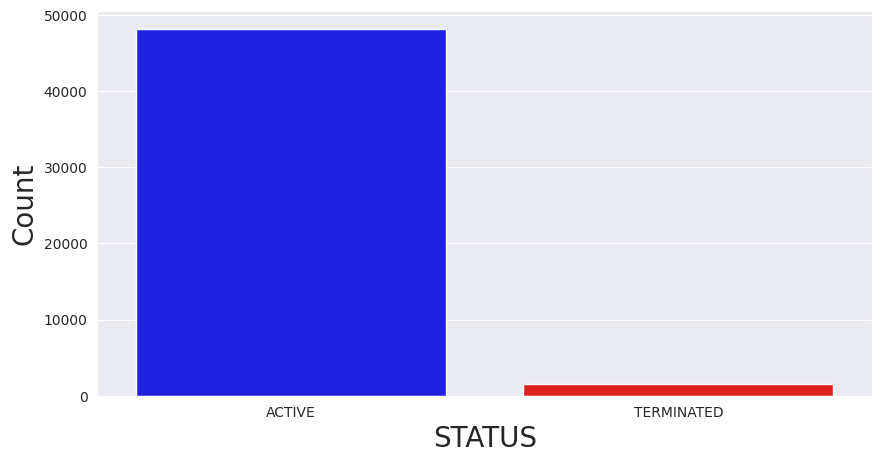

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for the 'STATUS' column
status_label = df.STATUS.value_counts()

# Create a list of colors corresponding to the categories
colors = ['blue', 'red']  # For example, blue for 'active' and red for 'terminated'

# Create the bar plot with specified colors
plt.figure(figsize=(10, 5))
sns.barplot(x=status_label.index, y=status_label.values, palette=colors)

# Set the labels for the axes
plt.xlabel('STATUS', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display the plot
plt.show()


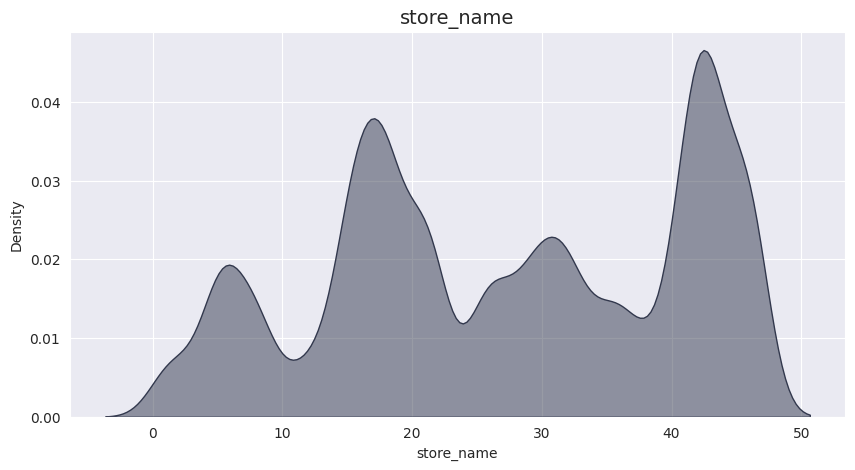

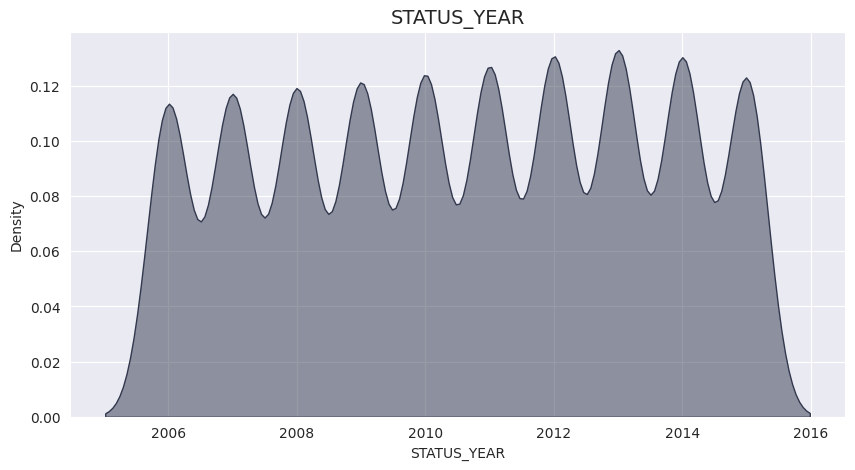

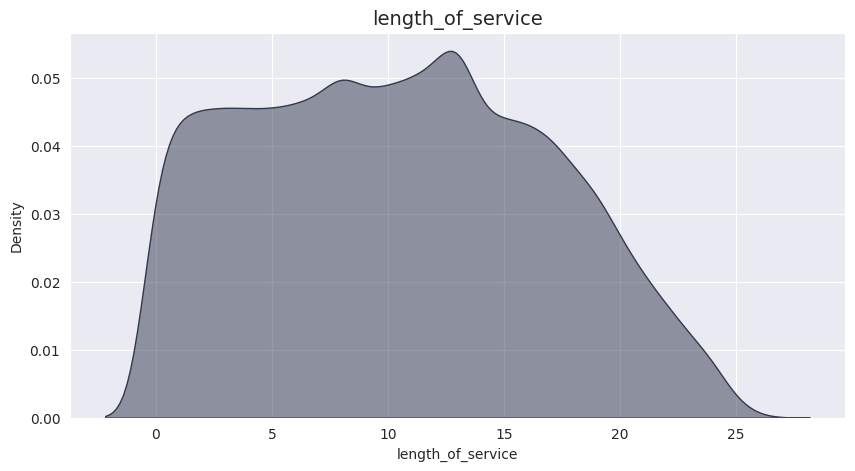

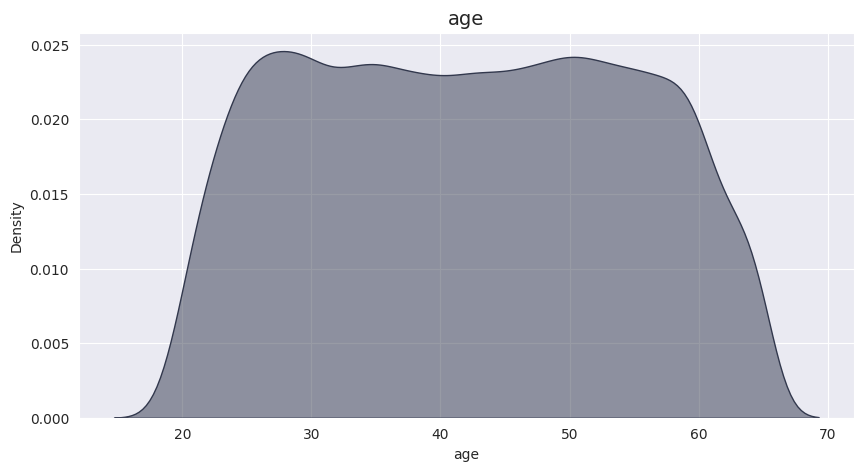

In [23]:
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column], color = '#32384D', shade = True, label = 'terminated', alpha = 0.5)
    plt.title(column, size = 14)

In [24]:
city_name_label = {value: key for key, value in enumerate(df['city_name'].unique())}
df['city_name'] = df['city_name'].map(city_name_label)

department_name_label = {value: key for key, value in enumerate(df['department_name'].unique())}
df['department_name'] = df['department_name'].map(department_name_label)

job_title_label = {value: key for key, value in enumerate(df['job_title'].unique())}
df['job_title'] = df['job_title'].map(job_title_label)

gender_short_label = {value: key for key, value in enumerate(df['gender_short'].unique())}
df['gender_short'] = df['gender_short'].map(gender_short_label)

term_desc_label = {value: key for key, value in enumerate(df['termreason_desc'].unique())}
df['termreason_desc'] = df['termreason_desc'].map(term_desc_label)

termtype_desc_label = {value: key for key, value in enumerate(df['termtype_desc'].unique())}
df['termtype_desc'] = df['termtype_desc'].map(termtype_desc_label)

status_label = {value: key for key, value in enumerate(df['STATUS'].unique())}
df['STATUS'] = df['STATUS'].map(status_label)

business_label = {value: key for key, value in enumerate(df['BUSINESS_UNIT'].unique())}
df['BUSINESS_UNIT'] = df['BUSINESS_UNIT'].map(business_label)

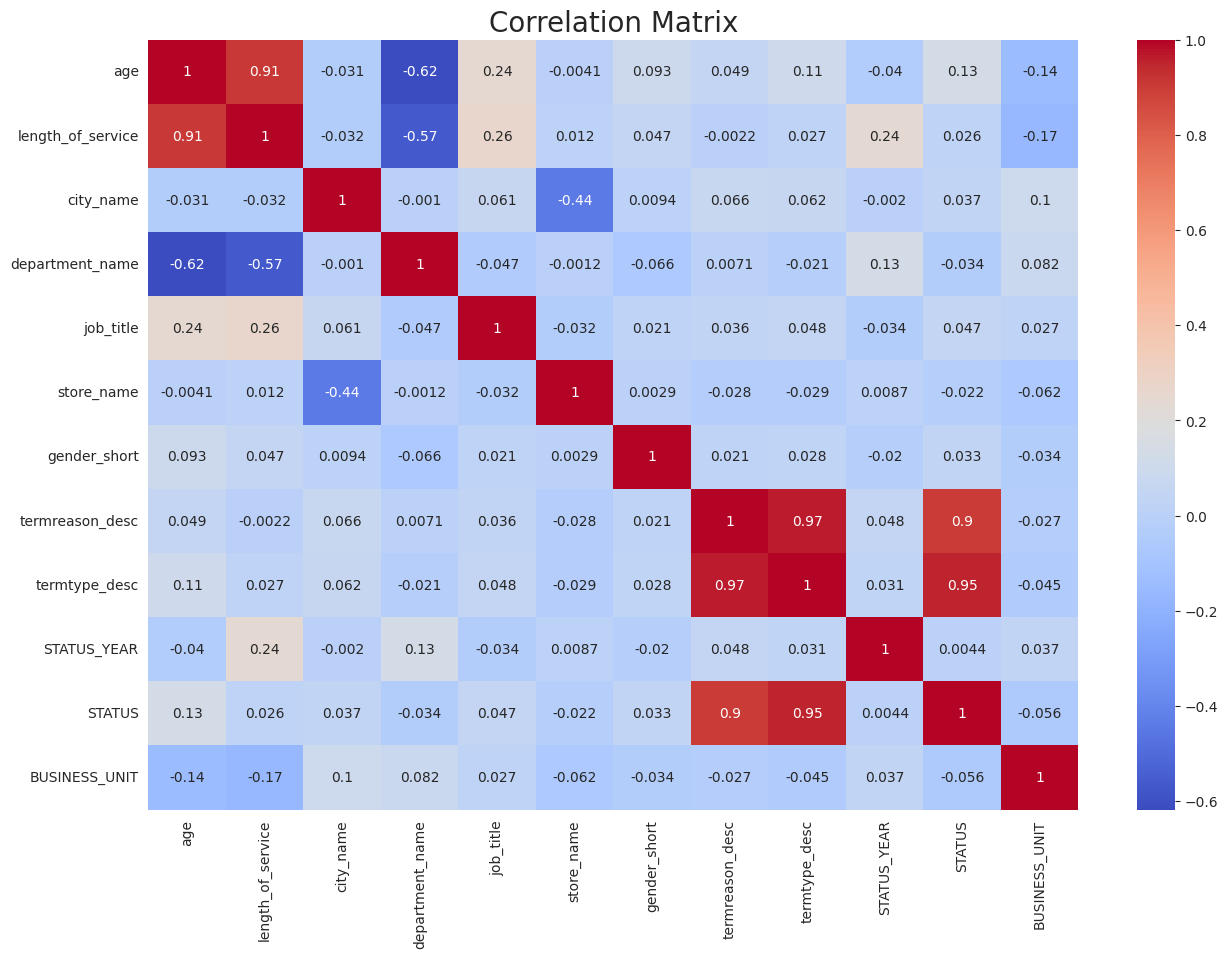

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)
plt.show()


In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation and sort by the "STATUS" column
correlation_with_status = numeric_df.corr()['STATUS'].sort_values(ascending=False)[1:]

# Display the result
print(correlation_with_status)


termtype_desc        0.954594
termreason_desc      0.901363
age                  0.132552
job_title            0.047283
city_name            0.037106
gender_short         0.033245
length_of_service    0.025808
STATUS_YEAR          0.004374
store_name          -0.021960
department_name     -0.033674
BUSINESS_UNIT       -0.056437
Name: STATUS, dtype: float64


In [27]:
df.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key'], axis=1, inplace=True)

In [28]:

def result(X, y, ts, rs, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [29]:
X = df[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = df[['STATUS']]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     48168
           1       0.53      0.08      0.14      1485

    accuracy                           0.97     49653
   macro avg       0.75      0.54      0.56     49653
weighted avg       0.96      0.97      0.96     49653

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9703945380943749
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


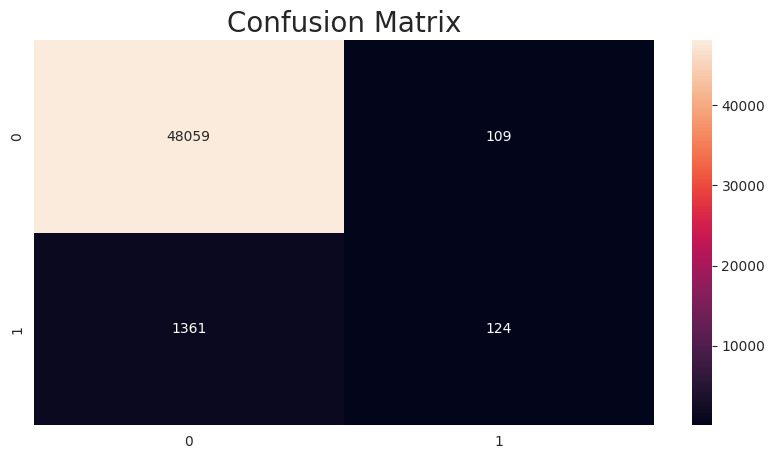

In [38]:
model = LogisticRegression()
result(X, y,  model)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48168
           1       0.97      0.87      0.91      1485

    accuracy                           1.00     49653
   macro avg       0.98      0.93      0.96     49653
weighted avg       1.00      1.00      0.99     49653

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.995126175659074
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


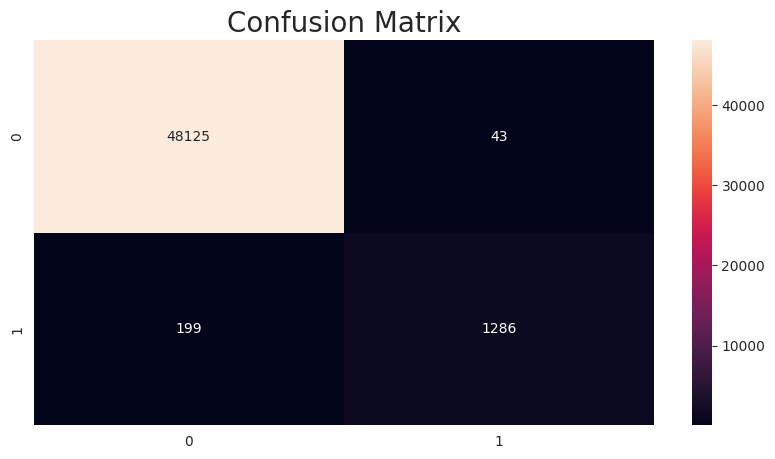

In [37]:
rf = RandomForestClassifier()
result(X, y, rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     48168
           1       0.90      0.57      0.70      1485

    accuracy                           0.99     49653
   macro avg       0.94      0.79      0.85     49653
weighted avg       0.98      0.99      0.98     49653

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9853181076672104
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


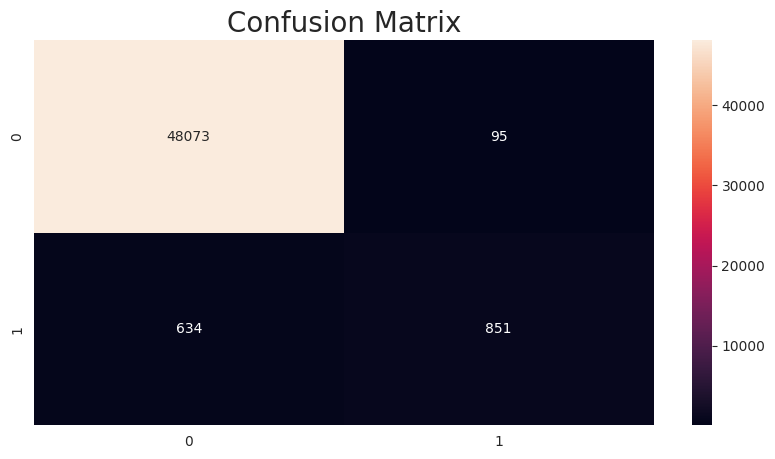

In [36]:
knn = KNeighborsClassifier()
result(X, y, knn)